In [610]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import flood, flood_fill
from skimage import util, transform
from skimage.transform import hough_circle, hough_circle_peaks
from skimage import morphology, draw, filters
import colorsys

## Question 1

In [51]:
def threshold_img(img, T):
    img[img <= T] = 0
    img[img > T] = 255
    return img

In [622]:
def floodemall(img):
    og = flood_fill(img, (0,0), 1)
    return og

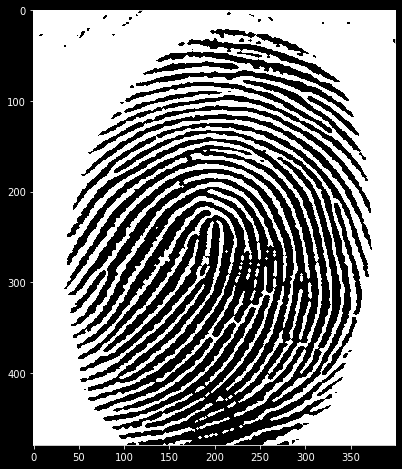

In [269]:
finger = cv2.imread('./input_data/finger.jpg', 0)
finger = threshold_img(finger, 125)
finger = morphology.binary_closing(np.invert(finger))
plt.figure(figsize=(8,8))
plt.imshow(np.invert(finger), cmap ="gray")
finger = finger.astype("uint8")
finger[finger==1] = 255

Loop 1
Loop 2
Loop 3
Loop 4
Loop 5
Loop 6
Loop 7
Loop 8
Loop 9


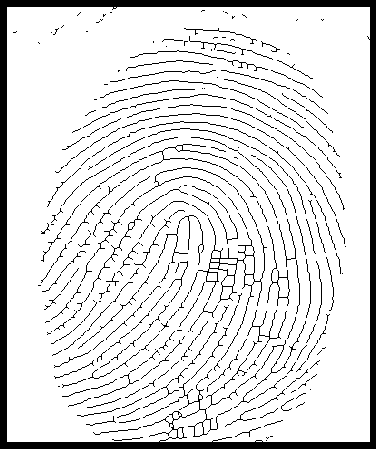

In [270]:
arr = [[0,0,0],[-1,1,-1],[1,1,1]]
arr2 = [[-1,0,0],[1,1,0],[-1,1,-1]]

kernel1 = np.asarray([[-1,-1,-1],[0,1,0],[1,1,1]])
kernel2 = np.asarray([[0,-1,-1],[1,1,-1],[0,1,0]])

def skeletony(img):
#     output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)
    img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel1)
    img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel2)
    img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, np.rot90(kernel1, 1))
    img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, np.rot90(kernel2, 1))
    img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, np.rot90(kernel1, 2))
    img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, np.rot90(kernel2, 2))
    img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, np.rot90(kernel1, 3))
    img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, np.rot90(kernel2, 3))
    return img

def skeletonize(img):
    temp1 = img
    i = 0
    while True:
        i += 1
        print("Loop " + str(i))
        temp2 = skeletony(temp1)
        if np.array_equal(temp1, temp2):
            break
        temp1 = np.copy(temp2)
    return temp1

plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(np.invert(skeletonize(finger)), cmap="gray")

### Part 2: Explain the role of structuring elements S1 and S2.
#### Ans: S1 detects pixels which occur on the edges of the objects and S2 detects pixels along the diagonal edges and at the corners of the objects. The Don't Care pixels play a vital role.

### Part 3:
#### Ans: Each pass removes pixels occuring on the boundary of the object. Thus, multiple passes is needed to ensure we get a skeleton of the defined image. Progressively, boundary pixels are removed until a skeleton one pixel wide is obtained.

### Part 4:


Loop 1
Loop 2
Loop 3
Loop 4
Loop 5
Loop 6
Loop 7
Loop 8
Loop 9
Loop 10


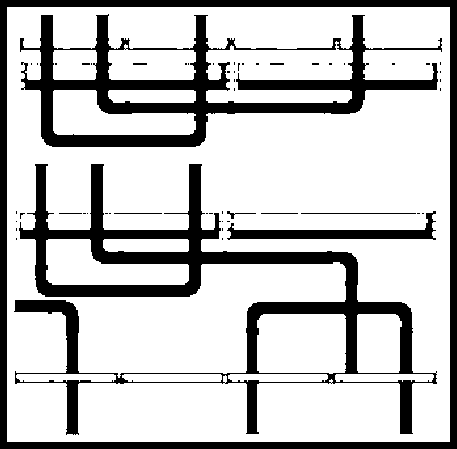

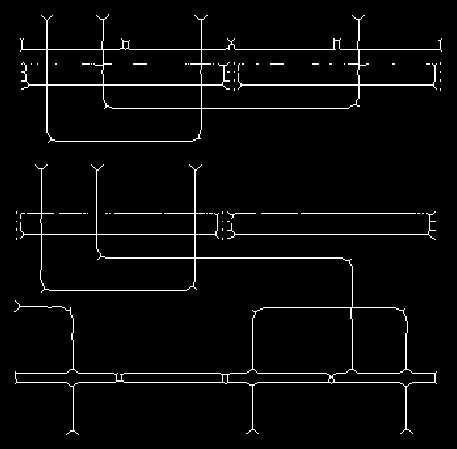

In [54]:
pipes = cv2.imread('./input_data/pipes.jpg', 0)
pipes = threshold_img(pipes, 125)
pipes = morphology.binary_closing(np.invert(pipes))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(np.invert(pipes), cmap ="gray")
pipes = pipes.astype("uint8")
pipes[pipes==1] = 255

plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(skeletonize(pipes), cmap="gray")

Loop 1
Loop 2
Loop 3
Loop 4
Loop 5
Loop 6
Loop 7
Loop 8
Loop 9
Loop 10
Loop 11
Loop 12
Loop 13
Loop 14
Loop 15
Loop 16
Loop 17
Loop 18
Loop 19
Loop 20
Loop 21
Loop 22
Loop 23
Loop 24
Loop 25
Loop 26
Loop 27
Loop 28
Loop 29
Loop 30
Loop 31
Loop 32
Loop 33
Loop 34
Loop 35
Loop 36
Loop 37
Loop 38
Loop 39
Loop 40
Loop 41
Loop 42
Loop 43
Loop 44
Loop 45
Loop 46
Loop 47
Loop 48
Loop 49
Loop 50
Loop 51
Loop 52
Loop 53
Loop 54
Loop 55
Loop 56
Loop 57
Loop 58
Loop 59
Loop 60
Loop 61
Loop 62
Loop 63
Loop 64
Loop 65
Loop 66
Loop 67
Loop 68
Loop 69
Loop 70
Loop 71
Loop 72
Loop 73
Loop 74
Loop 75
Loop 76
Loop 77
Loop 78
Loop 79
Loop 80
Loop 81
Loop 82
Loop 83
Loop 84
Loop 85
Loop 86
Loop 87
Loop 88
Loop 89
Loop 90
Loop 91
Loop 92
Loop 93
Loop 94
Loop 95
Loop 96
Loop 97
Loop 98
Loop 99
Loop 100
Loop 101
Loop 102
Loop 103
Loop 104
Loop 105
Loop 106
Loop 107
Loop 108
Loop 109
Loop 110
Loop 111
Loop 112
Loop 113
Loop 114
Loop 115
Loop 116
Loop 117
Loop 118
Loop 119
Loop 120
Loop 121
Loop 122
Loop 123
L

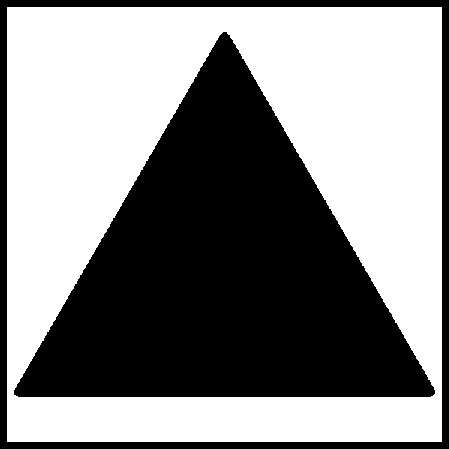

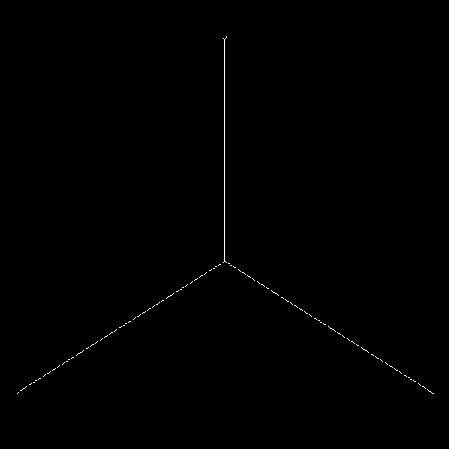

In [55]:
pipes = cv2.imread('./input_data/triangle.jpg', 0)
pipes = threshold_img(pipes, 125)
pipes = morphology.binary_closing(np.invert(pipes))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(np.invert(pipes), cmap ="gray")
pipes = pipes.astype("uint8")
pipes[pipes==1] = 255

plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(skeletonize(pipes), cmap="gray")

## Question 2

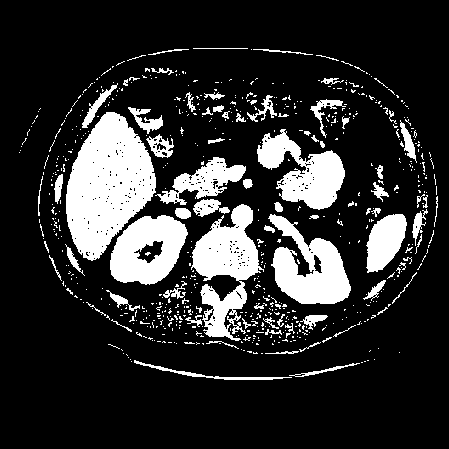

In [56]:
kidney = cv2.imread('./input_data/kidney.jpg', 0)
kidney = threshold_img(kidney, 130.5)
# kidney = morphology.binary_closing(kidney)
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(kidney, cmap ="gray")

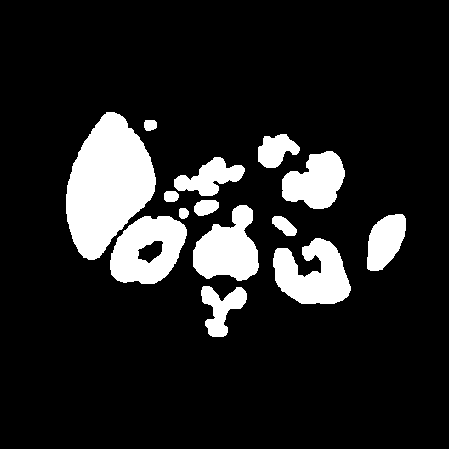

In [57]:
res = morphology.binary_closing(kidney, selem=morphology.disk(radius = 1))
res1 = morphology.binary_opening(kidney^res, selem=morphology.disk(radius =6.3))

image = 1*res1
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(image, cmap = "gray")

In [58]:
label = np.zeros_like((image)).astype("uint32")
img = image.copy()

max_label = 1

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 1:
            if img[i-1,j] or img[i,j-1] or img[i-1,j-1] or img[i-1,j+1]:
                neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                neigh = neigh[neigh > 0]
                label[i,j] = neigh.min()
                not_min = neigh[neigh != neigh.min()]
                for l in not_min:
                    label[label == l] = neigh.min()
                    
            else:
                max_label += 1
                label[i,j] = max_label

unique_vals = np.unique(label)
print(unique_vals)
for val in range(len(unique_vals)):
    label[label == unique_vals[val]] = val
    
print(np.unique(label))

[ 0  2  4  5 10 14 27 29 31 34 35 37 39 56 64]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


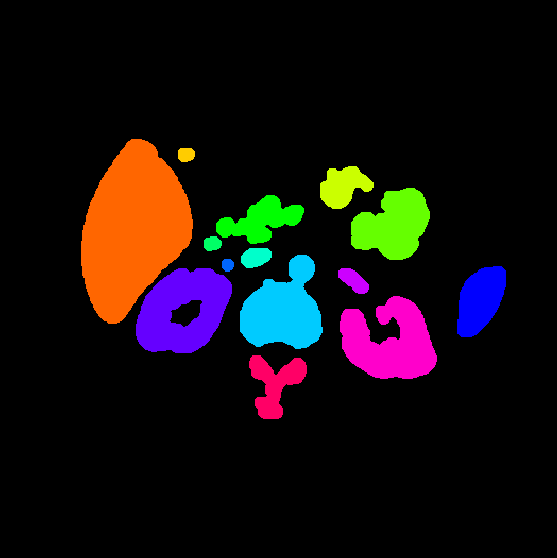

In [59]:
final = np.zeros((img.shape[0], img.shape[1], 3))
final[:, :, 0] = label
final[:, :, 1] = label
final[:, :, 2] = label
final = final.astype('uint8')


num_regions = len(np.unique(label))

for i in range(1, num_regions):
    final[label == i] = np.array(colorsys.hsv_to_rgb(i / num_regions, 1, 1)) * 255

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(final)

## Question 3

`plt.figure(figsize=(10, 10))`

`plt.imshow(edges, cmap="gray")`

`plt.axis('off')`

In [60]:
image = cv2.imread("./input_data/coins.jpg", 0)
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [1, 0, 3, ..., 0, 0, 1]], dtype=uint8)

(-0.5, 443.5, 772.5, -0.5)

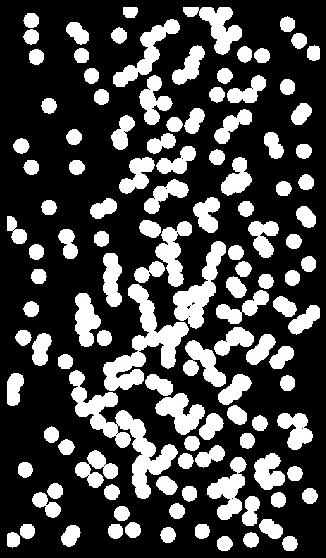

In [61]:
fig = plt.figure(figsize =(10,10))
plt.imshow(image, cmap = "gray")
plt.axis('off')

In [62]:
# image = util.img_as_bool(image)
coins = np.copy(image)
coins.shape

(773, 444)

In [487]:
coins = util.img_as_bool(coins)
edges = coins ^ morphology.binary_erosion(coins, selem=morphology.disk(radius = 1))

hough_radii = [8,9,10,11,12,13]
hough_res = transform.hough_circle(edges, hough_radii)
accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii, total_num_peaks=600)

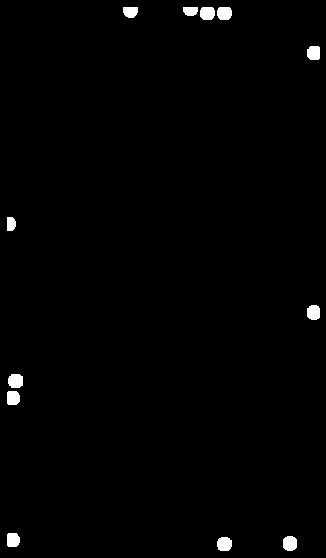

In [488]:
image = np.zeros((coins.shape[0] + 64, coins.shape[1] + 64, 3)).astype("uint8")
nonoverlap = []
circle_color = (255,255,255)


image1 = image.copy()
for center_y, center_x, radius in zip(cy, cx, radii):
    if (center_x - radius) <= 1 or (center_x + radius) >= (coins.shape[1]-1) or (center_y - radius) <= 1 or (center_y + radius) >= (coins.shape[0]-1):
        circy, circx = draw.circle(center_y + 32, center_x + 32, radius)
        image1[circy, circx] = circle_color

fig = plt.figure(figsize=(10, 10))
plt.imshow(image1[32:-32, 32:-32, :], cmap="gray")
plt.axis('off')
plt.show()

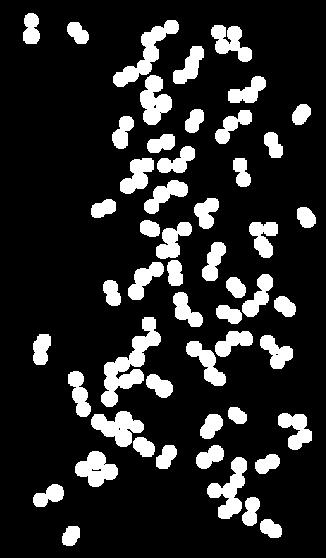

In [489]:
image2 = image.copy()
for center1_y, center1_x, radius1 in zip(cy, cx, radii):
    nonoverlappy = 0
    for center2_y, center2_x, radius2 in zip(cy, cx, radii):
        if abs(center1_x - center2_x) <= 7 and abs(center1_y - center2_y) <= 7:
            continue
        sum_rad = radius1 + radius2
        dist = np.sqrt((center1_x - center2_x)**2 + (center1_y - center2_y)**2)
        if dist < sum_rad:
            nonoverlappy = 1
            circ1y, circ1x = draw.circle(center1_y + 32, center1_x + 32, radius1)
            image2[circ1y, circ1x] = circle_color
            circ2y, circ2x = draw.circle(center2_y + 32, center2_x + 32, radius2)
            image2[circ2y, circ2x] = circle_color
            break
    if nonoverlappy == 0:
        nonoverlap.append((center1_x, center1_y, radius1))
        

fig = plt.figure(figsize=(10, 10))
plt.imshow(image2[32:-32, 32:-32, :], cmap="gray")
plt.axis('off')
plt.show()

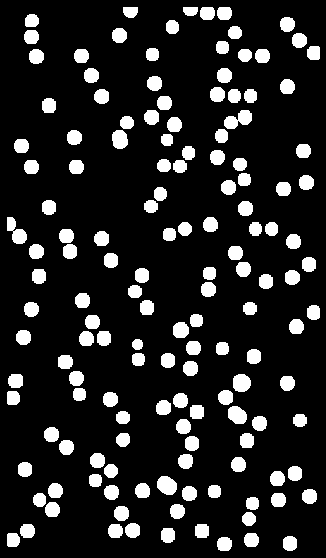

In [490]:
image = np.zeros((coins.shape[0] + 64, coins.shape[1] + 64, 3)).astype("uint8")

for c_x, c_y, radius in nonoverlap:
    circy, circx = draw.circle(c_y + 32, c_x + 32, radius)
    image[circy, circx] = circle_color
    
fig = plt.figure(figsize=(10, 10))
plt.imshow(image[32:-32, 32:-32, :], cmap="gray")
plt.axis('off')
plt.show()

## Question 4

1


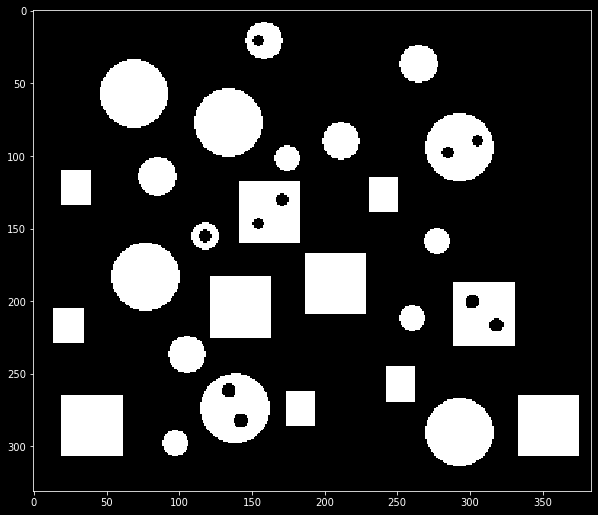

In [453]:
image = cv2.imread("./input_data/objects.png", 0)
image = threshold_img(image, 130.5)
image[image==255] = 1
print(image.max())
plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")

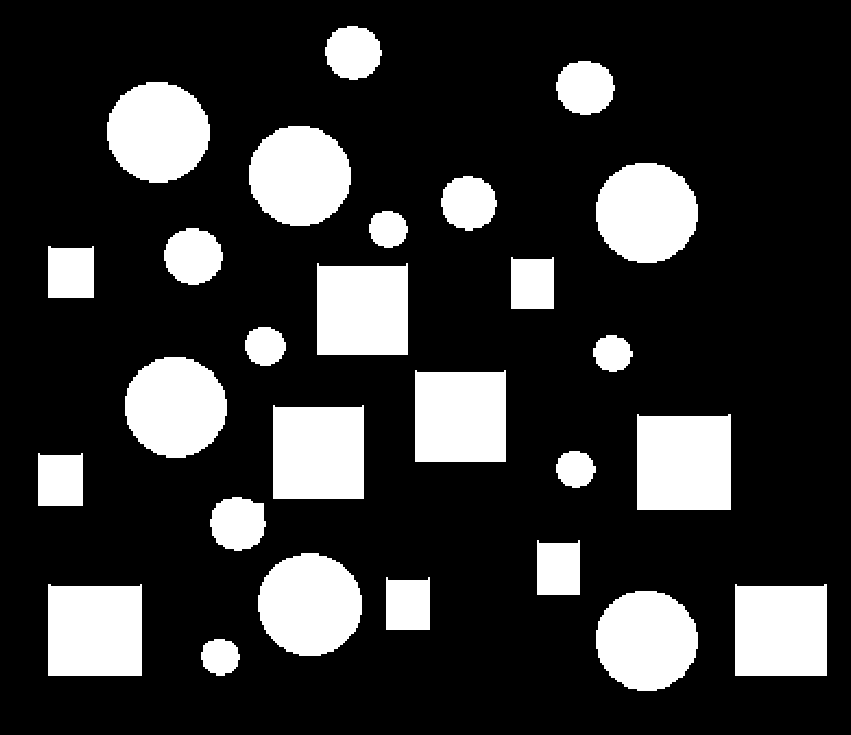

In [452]:
img = image.copy()
# img = skeletony(np.asarray(img).astype("uint8"))
img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel1)
img = img ^ cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel2)
img = morphology.binary_closing(img)
img = morphology.binary_closing(img, selem=morphology.square(8))

plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(img, cmap="gray")


In [457]:
label = np.zeros_like((image)).astype("uint32")
# img = image.copy()

max_label = 1

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 1:
            if img[i-1,j] or img[i,j-1] or img[i-1,j-1] or img[i-1,j+1]:
                neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                neigh = neigh[neigh > 0]
                label[i,j] = neigh.min()
                not_min = neigh[neigh != neigh.min()]
                for l in not_min:
                    label[label == l] = neigh.min()
                    
            else:
                max_label += 1
                label[i,j] = max_label

unique_vals = np.unique(label)
print(unique_vals)
for val in range(len(unique_vals)):
    label[label == unique_vals[val]] = val
    
og = label.copy()
print(np.unique(label))

[ 0  2  5  8 13 18 22 26 28 31 33 35 37 40 42 47 49 51 53 54 57 60 62 67
 69 71 73 78]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


In [458]:
labels = label.copy()
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if (image*label)[i,j] == label[i,j] or (image*label)[i+1,j+1] == label[i+1,j+1] or (image*label)[i+1,j+1] == label[i+1,j+3]:
            labels[i,j] = 0

In [459]:
main_list = np.setdiff1d(label,labels)
for i in range(label.shape[0]):
    for j in range(label.shape[1]):
        if label[i,j] in main_list:
            label[i,j] = 0

unique_vals = np.unique(label)
print(unique_vals)
for val in range(len(unique_vals)):
    label[label == unique_vals[val]] = val

[ 0  1  5 11 12 17 22]


### Part A

The number of objects with 1/more holes in them: 6


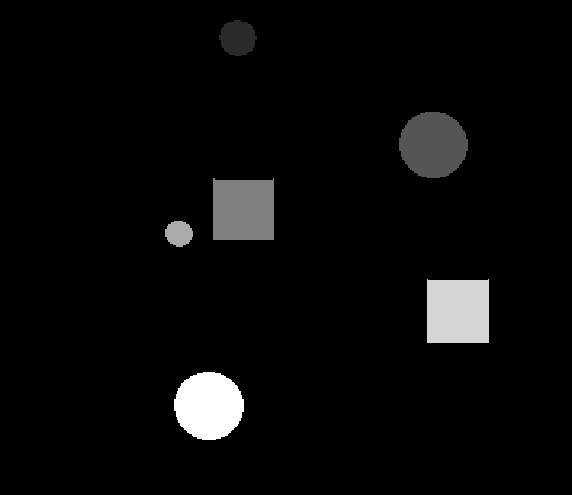

In [460]:
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(label, cmap = "gray")
print("The number of objects with 1/more holes in them: " + str(len(np.unique(label)) - 1))

### Part B

[ 0  9 10 11 15 16 17 19 21 23 24 25]


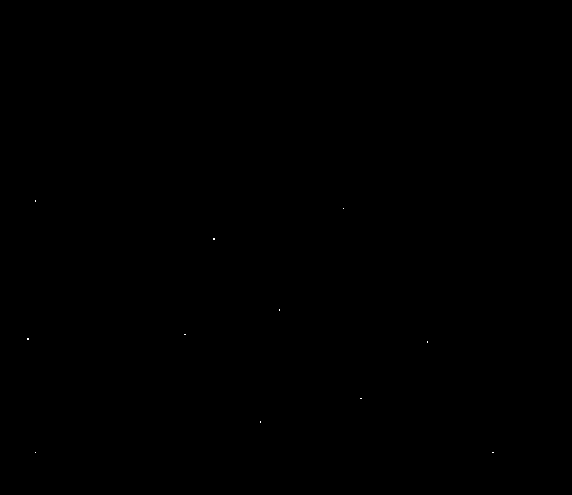

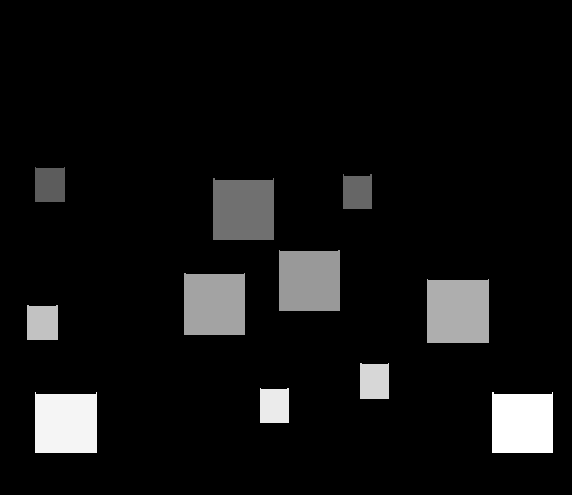

In [469]:
kernel = np.asarray([[-1,1,1],[-1,1,1],[-1,-1,-1]])
squares = cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel)
sq_label = og * squares
print(np.unique(sq_label))

main_list = np.setdiff1d(og,sq_label)
label_sq = og.copy()
for i in range(og.shape[0]):
    for j in range(og.shape[1]):
        if og[i,j] in main_list:
            label_sq[i,j] = 0

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(squares, cmap='gray')
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(label_sq, cmap='gray')

In [479]:
print("Number of squares =",len(np.unique(label_sq)) - 1)

Number of squares = 11


### Part C

In [482]:
print("Number of squares with holes =", len(np.intersect1d(np.unique(labels), np.unique(label_sq))) - 1)


Number of squares with holes = 2


### Part D

In [486]:
circles = np.setdiff1d(np.unique(og), np.unique(label_sq))
circles_no_holes = np.setdiff1d(circles, np.unique(labels))

print("Number of circles with no holes =", len(circles_no_holes))

Number of circles with no holes = 12


## Question 5
 `plt.figure(figsize=(5,5))`

 `plt.axis("off")`
 
 `plt.imshow(np.invert(img), cmap="gray")`

In [528]:
og = cv2.cvtColor(cv2.imread('./input_data/fivecolor.png'), cv2.COLOR_BGR2RGB)

colors = [
    [112, 48, 160],
    [0, 176, 80],
    [255, 0, 0],
    [31, 73, 125],
    [0,0,0]
]
imgs = []

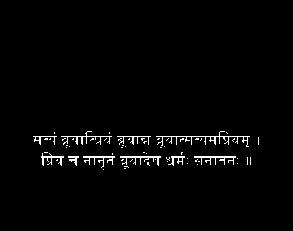

In [529]:
for color in colors:
    img_color = np.zeros((og.shape[0], og.shape[1])).astype("uint8")
    
    for i in range(og.shape[0]):
        for j in range(og.shape[1]):
            
            if og[i, j, :].tolist() == color:
                img_color[i, j] = 255
    imgs.append(img_color)

plt.axis("off")
plt.imshow(imgs[1], cmap="gray")

for i in range(len(imgs)):
    imgs[i][imgs[i] == 255] = 1

In [561]:
    
for i in range(len(imgs)):
    img = imgs[i].copy()
    img = np.pad(img, 3, mode = 'constant')
    label = np.zeros_like((img)).astype("uint32")
    max_label = 1

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == 1:
                if img[i-1,j] or img[i,j-1] or img[i-1,j-1] or img[i-1,j+1]:
                    neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                    neigh = neigh[neigh > 0]
                    label[i,j] = neigh.min()
                    not_min = neigh[neigh != neigh.min()]
                    for l in not_min:
                        label[label == l] = neigh.min()
                        
                else:
                    max_label += 1
                    label[i,j] = max_label

    unique_vals = np.unique(label)
    for val in range(len(unique_vals)):
        label[label == unique_vals[val]] = val
        
    og = label.copy()
    print(len(np.unique(label)) - 1)

34
74
24
27
243


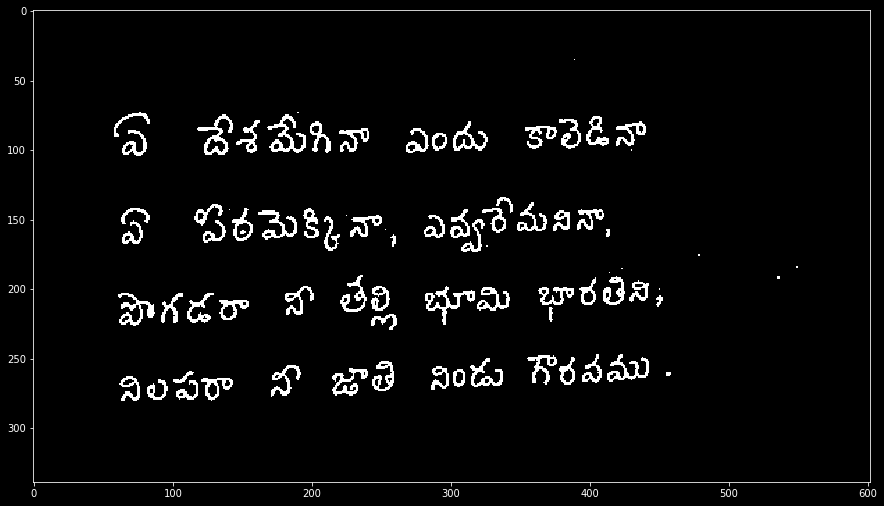

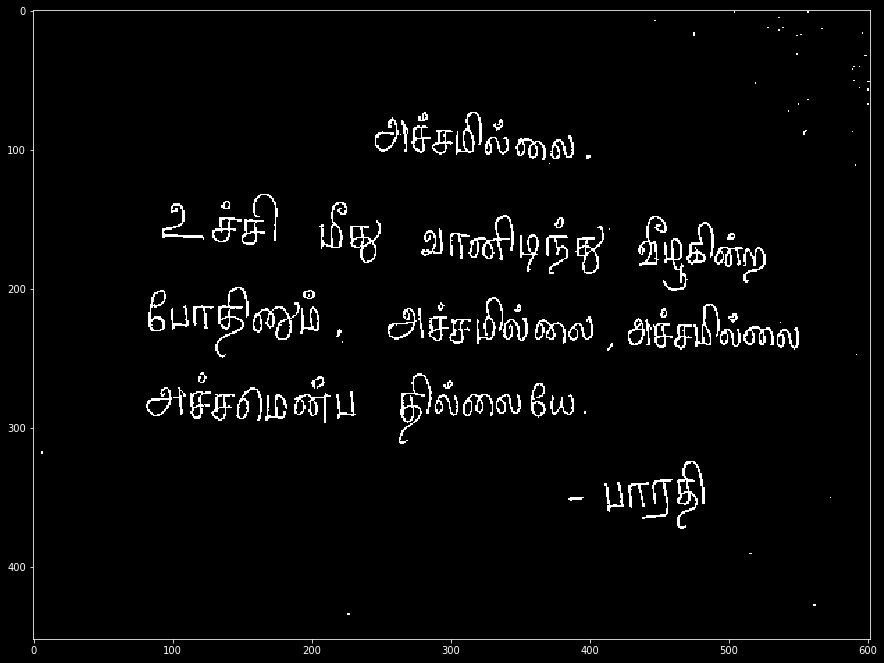

In [758]:
telugu = cv2.imread("./input_data/telugu.jpeg", 0)
weird = cv2.imread("./input_data/weird.jpeg", 0)
telugu = telugu.astype("uint8")

# telugu[telugu==255] = 1
# telugu[:,460:] = 1
# telugu[288:,:] = 1
# telugu[:,:60] = 1
telugu = cv2.adaptiveThreshold(telugu,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11,6)

weird = cv2.adaptiveThreshold(weird,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11,6)

# telugu = morphology.binary_closing(np.invert(telugu))
plt.figure(figsize=(15,15))
plt.imshow(np.invert(telugu), cmap ="gray")

plt.figure(figsize=(15,15))
plt.imshow(np.invert(weird), cmap ="gray")

In [748]:
telugu = np.invert(telugu)
telugu[telugu==255] = 1
telugu[telugu==254] = 0
# plt.imshow(telugu, cmap="gray")


img = telugu.copy()
label = np.zeros_like((img)).astype("uint32")
max_label = 1

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 1:
            if img[i-1,j] or img[i,j-1] or img[i-1,j-1] or img[i-1,j+1]:
                neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                neigh = neigh[neigh > 0]
                try:
                    l = neigh.min()
                except ValueError:  #raised if `y` is empty.
                    pass
                label[i,j] = l
                not_min = neigh[neigh != l]
                for ab in not_min:
                    label[label == ab] = l
                    
            else:
                max_label += 1
                label[i,j] = max_label

unique_vals = np.unique(label)
print(unique_vals)
for val in range(len(unique_vals)):
    label[label == unique_vals[val]] = val
    
print(np.unique(label))

[  0   2   3   4   7   8  11  13  15  16  17  18  24  29  30  32  39  61
  63  64  65  66  67  68  69  72  74  76  79  80  85  86  87  90  99 101
 102 113 115 116 124 131 134 135 136 137 138 139 140 141 143 148 149 150
 152 153 160 166 167 168 179 183 195 201 205 206 207 210 212 213 218 222
 224 226 228 235 240 244 247 250]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]


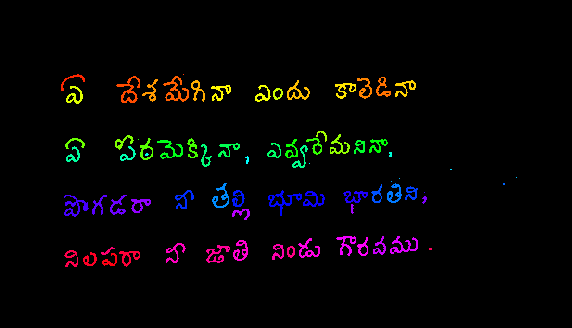

In [749]:
final = np.zeros((img.shape[0], img.shape[1], 3))
final[:, :, 0] = label
final[:, :, 1] = label
final[:, :, 2] = label
final = final.astype('uint8')


num_regions = len(np.unique(label))

for i in range(1, num_regions):
    final[label == i] = np.array(colorsys.hsv_to_rgb(i / num_regions, 1, 1)) * 255

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(final)

In [750]:
label_universal = label.copy()
holes = np.zeros_like((np.unique(label_universal)))

one_hole = np.zeros_like((label))
two_hole = np.zeros_like((label))
for comp in range(1,len(np.unique(label_universal))):
    tempo = np.zeros_like(label_universal)
    for x in range(label_universal.shape[0]):
        for y in range(label_universal.shape[1]):
            if label_universal[x,y] == comp:
                tempo[x,y] = 1
    # tempo = morphology.binary_closing(tempo)
    org_temp = tempo
    tempo = floodemall(tempo)
    tempo = np.invert(tempo.astype("bool")) * 1
    # print(np.unique(tempo))
    img = tempo.copy()
    label = np.zeros_like((img)).astype("uint32")
    max_label = 1

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == 1:
                if img[i-1,j] or img[i,j-1] or img[i-1,j-1] or img[i-1,j+1]:
                    neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                    neigh = neigh[neigh > 0]
                    l = neigh.min()
                    label[i,j] = l
                    not_min = neigh[neigh != l]
                    for ab in not_min:
                        label[label == ab] = l
                        
                else:
                    max_label += 1
                    label[i,j] = max_label

    unique_vals = np.unique(label)
    holes[comp] = len(unique_vals) - 1
    if holes[comp] == 1:
        one_hole += org_temp
    elif holes[comp] == 2:
        two_hole += org_temp
    

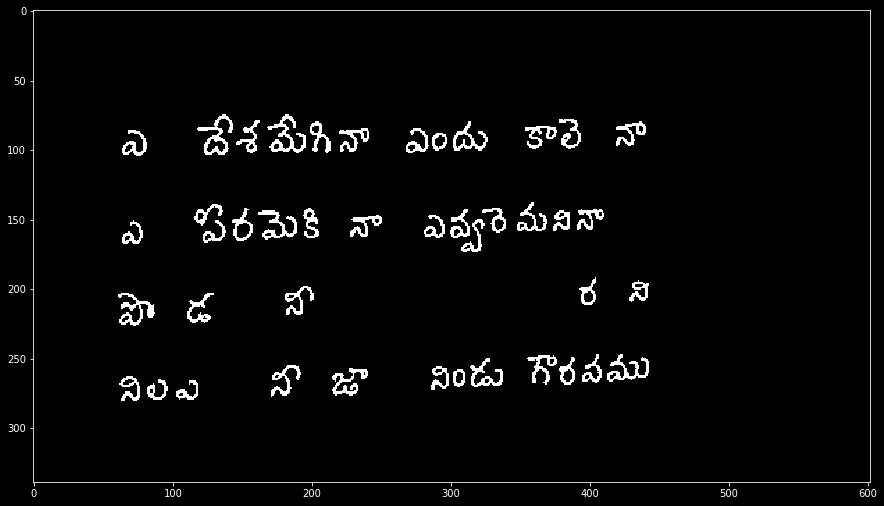

In [751]:
plt.figure(figsize=(15,15))
plt.imshow(one_hole, cmap="gray")

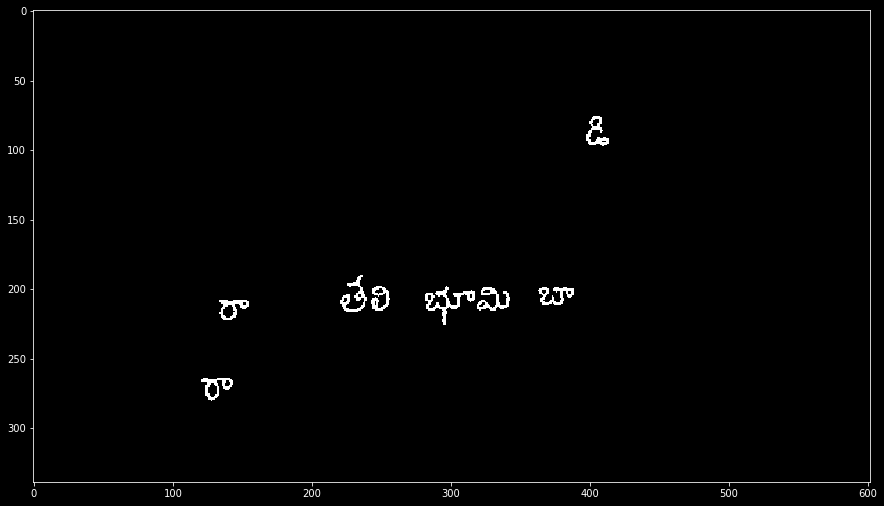

In [752]:
plt.figure(figsize=(15,15))
plt.imshow(two_hole, cmap="gray")

In [762]:
weird = np.invert(weird)
weird[weird==255] = 1
weird[weird==254] = 0
# plt.imshow(telugu, cmap="gray")


img = weird.copy()
img = np.pad(img, 3, mode = 'constant')
label = np.zeros_like((img)).astype("uint32")
max_label = 1

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 1:
            if img[i-1,j] or img[i,j-1] or img[i-1,j-1] or img[i-1,j+1]:
                neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                neigh = neigh[neigh > 0]
                try:
                    l = neigh.min()
                except ValueError:  #raised if `y` is empty.
                    pass
                label[i,j] = l
                not_min = neigh[neigh != l]
                for ab in not_min:
                    label[label == ab] = l
                    
            else:
                max_label += 1
                label[i,j] = max_label

unique_vals = np.unique(label)
print(unique_vals)
for val in range(len(unique_vals)):
    label[label == unique_vals[val]] = val
    
print(np.unique(label))

[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  31  32  33  35  38  39  42
  44  45  46  48  55  56  57  58  59  60  61  65  67  68  70  71  73  74
  81  85  86  90  91  92  95 102 113 115 130 133 134 139 141 142 145 146
 147 148 154 158 159 160 165 169 170 174 175 177 181 182 187 191 195 197
 198 201 204 208 223 224 227 228 229 231 234 235 238 239 240 242 245 249
 251 253 256 257 259 261 284 291 292 293 296 297 302 303 313 314 315]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 1

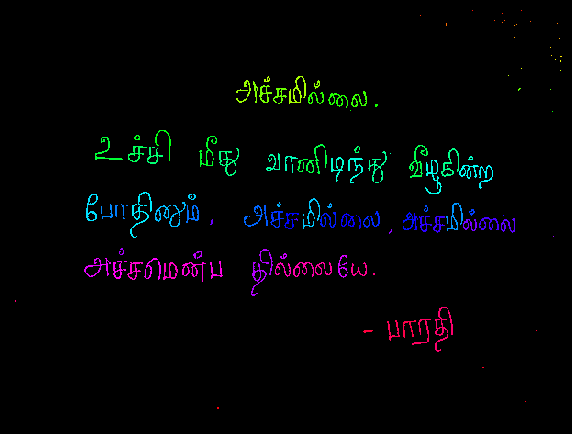

In [763]:
final = np.zeros((img.shape[0], img.shape[1], 3))
final[:, :, 0] = label
final[:, :, 1] = label
final[:, :, 2] = label
final = final.astype('uint8')


num_regions = len(np.unique(label))

for i in range(1, num_regions):
    final[label == i] = np.array(colorsys.hsv_to_rgb(i / num_regions, 1, 1)) * 255

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(final)

In [764]:
label_universal = label.copy()
holes = np.zeros_like((np.unique(label_universal)))

one_hole = np.zeros_like((label))
two_hole = np.zeros_like((label))
for comp in range(1,len(np.unique(label_universal))):
    tempo = np.zeros_like(label_universal)
    for x in range(label_universal.shape[0]):
        for y in range(label_universal.shape[1]):
            if label_universal[x,y] == comp:
                tempo[x,y] = 1
    # tempo = morphology.binary_closing(tempo)
    org_temp = tempo
    tempo = floodemall(tempo)
    tempo = np.invert(tempo.astype("bool")) * 1
    # print(np.unique(tempo))
    img = tempo.copy()
    label = np.zeros_like((img)).astype("uint32")
    max_label = 1

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == 1:
                if img[i-1,j] or img[i,j-1] or img[i-1,j-1] or img[i-1,j+1]:
                    neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                    neigh = neigh[neigh > 0]
                    l = neigh.min()
                    label[i,j] = l
                    not_min = neigh[neigh != l]
                    for ab in not_min:
                        label[label == ab] = l
                        
                else:
                    max_label += 1
                    label[i,j] = max_label

    unique_vals = np.unique(label)
    holes[comp] = len(unique_vals) - 1
    if holes[comp] == 1:
        one_hole += org_temp
    elif holes[comp] == 2:
        two_hole += org_temp
    

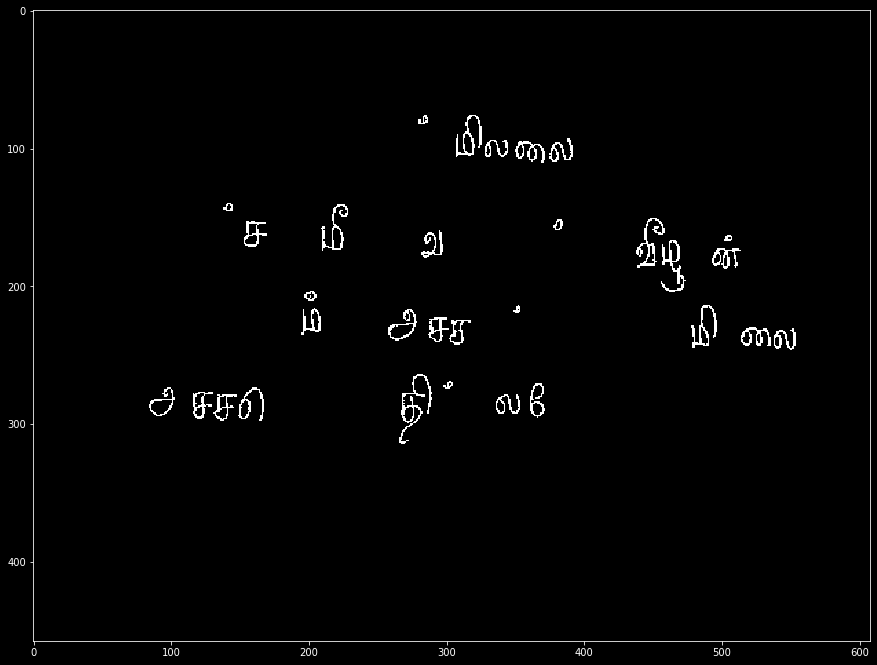

In [765]:
plt.figure(figsize=(15,15))
plt.imshow(one_hole, cmap="gray")

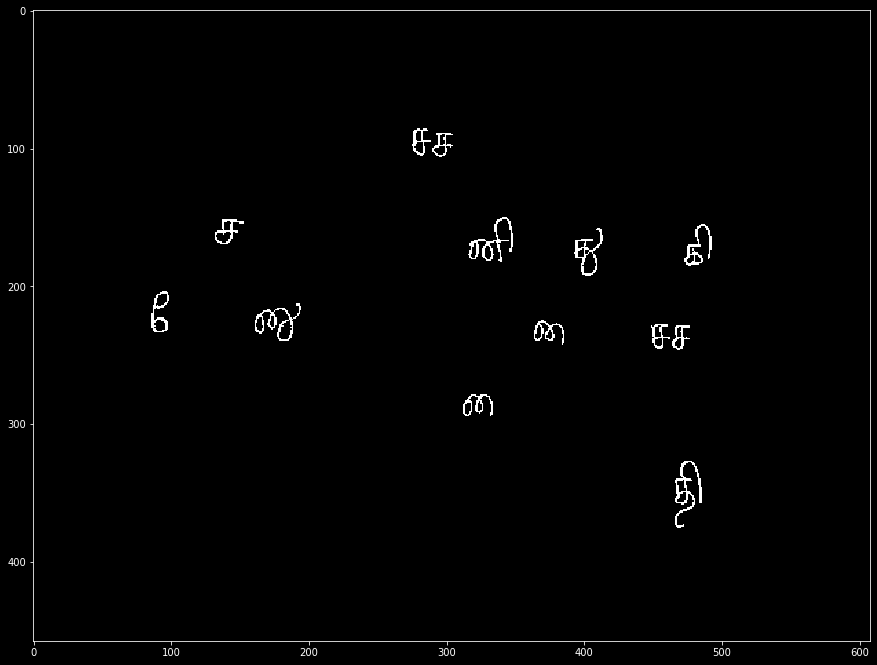

In [766]:
plt.figure(figsize=(15,15))
plt.imshow(two_hole, cmap="gray")